# Vanilla Models 

In [1]:
#Import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, plot_confusion_matrix, classification_report, f1_score, accuracy_score

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from HelperFunctions import compare_models, transform_split_data

import warnings
warnings.filterwarnings('ignore')

## Pre-Processing

In [2]:
#Import the CSV with clean data
df = pd.read_csv('data/clean_churn_cata.csv')

#Preview
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_minutes,total_charge
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.56
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.24
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.29
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,255,564.8,66.80
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.09


I'm using a custom function **transform_split_data** that does the following the pre-processing actions in one step: <br><br>
 (1) Creates dummies for all categorical variables, in this case for "state" <br><br>
 (2) Splits data into training and testing sets <br><br>
 (3) Scales the numerical variables using StandardScaler() <br><br>
 (4) Uses SMOTE to fix the class imbalance in the dataset by oversamlping <br>

In [4]:
X_train, X_test, y_train, y_test = transform_split_data(df, "churn", scale = True)

Let's do a sanity check and look at the shapes for our train and test sets; just to make sure it all matches:

In [5]:
X_train.shape

(4282, 70)

In [6]:
y_train.shape

(4282,)

In [7]:
X_test.shape

(834, 70)

In [8]:
y_test.shape

(834,)

All good! Let's fit some models. 

## Fitting and Comparing Vanilla Models  

Since the next custom function I'm using produces a very lengthy output, I'm using this piece of code to force the notebook to disable scrolling and display the entire output. 

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
#Create lists with the model objects and model names that I'm going to feed to the custom function that compares them

models = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(random_state=2142), RandomForestClassifier(random_state=2142),
          BaggingClassifier(random_state=2142), AdaBoostClassifier(random_state=2142), GradientBoostingClassifier(random_state=2142), XGBClassifier(random_state=2142), SVC(random_state=2142)]
        
names = ['Log Regression','KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Bagging Classifier', 'AdaBoost', 'Gradient Boosting', 'XGB','SVM']



----------------------------------------------------------------------------------------------------
Log Regression


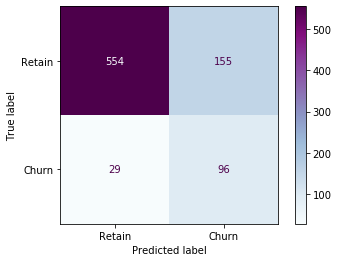

Here's how the Log Regression model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2141
           1       0.80      0.82      0.81      2141

    accuracy                           0.80      4282
   macro avg       0.80      0.80      0.80      4282
weighted avg       0.80      0.80      0.80      4282

---------------------------------------------------------------------------
Here's how the Log Regression model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       709
           1       0.38      0.77      0.51       125

    accuracy                           0.78       834
   macro avg       0.67      0.77      0.68       834
weighted avg       0.87      0.78      0.81       834



----------------------------------------------------------------------------------------------------
KNN


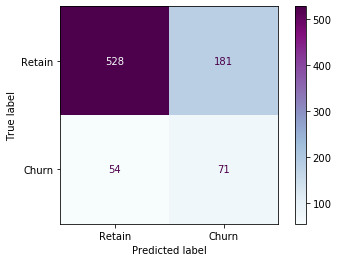

Here's how the KNN model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2141
           1       0.85      0.99      0.92      2141

    accuracy                           0.91      4282
   macro avg       0.92      0.91      0.91      4282
weighted avg       0.92      0.91      0.91      4282

---------------------------------------------------------------------------
Here's how the KNN model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       709
           1       0.28      0.57      0.38       125

    accuracy                           0.72       834
   macro avg       0.59      0.66      0.60       834
weighted avg       0.81      0.72      0.75       834



----------------------------------------------------------------------------------------------------
Naive Bayes


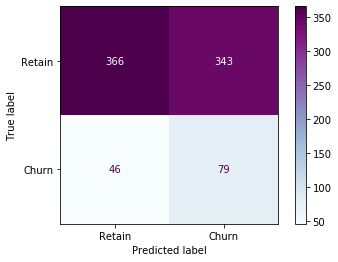

Here's how the Naive Bayes model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.71      0.54      0.61      2141
           1       0.63      0.78      0.70      2141

    accuracy                           0.66      4282
   macro avg       0.67      0.66      0.65      4282
weighted avg       0.67      0.66      0.65      4282

---------------------------------------------------------------------------
Here's how the Naive Bayes model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.89      0.52      0.65       709
           1       0.19      0.63      0.29       125

    accuracy                           0.53       834
   macro avg       0.54      0.57      0.47       834
weighted avg       0.78      0.53      0.60       834



----------------------------------------------------------------------------------------------------
Decision Tree


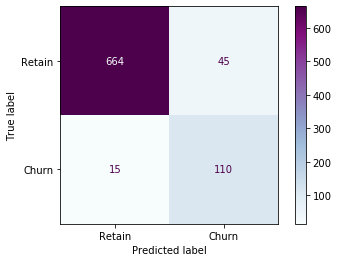

Here's how the Decision Tree model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

---------------------------------------------------------------------------
Here's how the Decision Tree model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       709
           1       0.71      0.88      0.79       125

    accuracy                           0.93       834
   macro avg       0.84      0.91      0.87       834
weighted avg       0.94      0.93      0.93       834



----------------------------------------------------------------------------------------------------
Random Forest


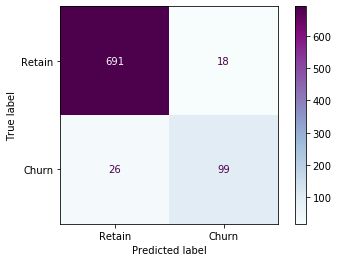

Here's how the Random Forest model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

---------------------------------------------------------------------------
Here's how the Random Forest model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       709
           1       0.85      0.79      0.82       125

    accuracy                           0.95       834
   macro avg       0.90      0.88      0.89       834
weighted avg       0.95      0.95      0.95       834



----------------------------------------------------------------------------------------------------
Bagging Classifier


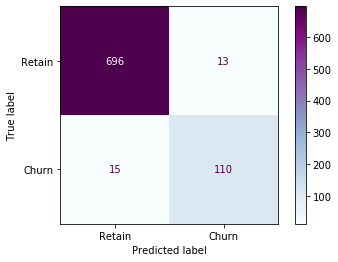

Here's how the Bagging Classifier model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2141
           1       1.00      0.99      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

---------------------------------------------------------------------------
Here's how the Bagging Classifier model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       709
           1       0.89      0.88      0.89       125

    accuracy                           0.97       834
   macro avg       0.94      0.93      0.93       834
weighted avg       0.97      0.97      0.97       834



----------------------------------------------------------------------------------------------------
AdaBoost


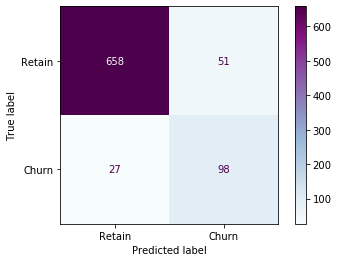

Here's how the AdaBoost model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2141
           1       0.92      0.92      0.92      2141

    accuracy                           0.92      4282
   macro avg       0.92      0.92      0.92      4282
weighted avg       0.92      0.92      0.92      4282

---------------------------------------------------------------------------
Here's how the AdaBoost model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       709
           1       0.66      0.78      0.72       125

    accuracy                           0.91       834
   macro avg       0.81      0.86      0.83       834
weighted avg       0.92      0.91      0.91       834



----------------------------------------------------------------------------------------------------
Gradient Boosting


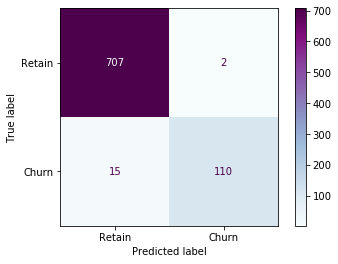

Here's how the Gradient Boosting model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2141
           1       1.00      0.96      0.98      2141

    accuracy                           0.98      4282
   macro avg       0.98      0.98      0.98      4282
weighted avg       0.98      0.98      0.98      4282

---------------------------------------------------------------------------
Here's how the Gradient Boosting model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       709
           1       0.98      0.88      0.93       125

    accuracy                           0.98       834
   macro avg       0.98      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834



----------------------------------------------------------------------------------------------------
XGB


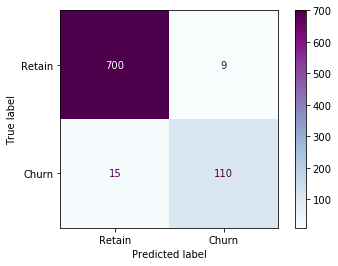

Here's how the XGB model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2141
           1       0.99      0.96      0.97      2141

    accuracy                           0.97      4282
   macro avg       0.98      0.97      0.97      4282
weighted avg       0.98      0.97      0.97      4282

---------------------------------------------------------------------------
Here's how the XGB model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       709
           1       0.92      0.88      0.90       125

    accuracy                           0.97       834
   macro avg       0.95      0.93      0.94       834
weighted avg       0.97      0.97      0.97       834



----------------------------------------------------------------------------------------------------
SVM


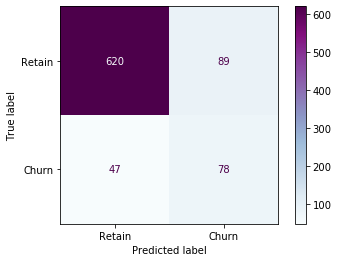

Here's how the SVM model performed with the TRAINING data: 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2141
           1       0.92      0.96      0.94      2141

    accuracy                           0.94      4282
   macro avg       0.94      0.94      0.94      4282
weighted avg       0.94      0.94      0.94      4282

---------------------------------------------------------------------------
Here's how the SVM model performed with the TESTING data: 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       709
           1       0.47      0.62      0.53       125

    accuracy                           0.84       834
   macro avg       0.70      0.75      0.72       834
weighted avg       0.86      0.84      0.85       834



,Model,Recall Score,Accuracy(Test),F1 Score
0,Log Regression,0.768,0.779376,0.510638
1,KNN,0.568,0.718225,0.376658
2,Naive Bayes,0.632,0.533573,0.288848
3,Decision Tree,0.880,0.928058,0.785714
4,Random Forest,0.792,0.947242,0.818182
5,Bagging Classifier,0.880,0.966427,0.887097
6,AdaBoost,0.784,0.906475,0.715328
7,Gradient Boosting,0.880,0.979616,0.928270
8,XGB,0.880,0.971223,0.901639
9,SVM,0.624,0.836930,0.534247


In [15]:
compare_models(X_train, X_test, y_train, y_test, models, names)

### Metric to Use:

##### Recall

Given the business problem at hand, I believe the best metric to use is Recall. It is better to categorize a loyal customer as someone likely to churn instead of misclassifying a departing customer as loyal, in which case we won't enroll them in our retention program. Financially, that could be the difference between offering someone a discount that wasn't really needed (in a False Positive scenario) vs. having to acquire an entirely new client to make up for False Negative. 

### Analysis: 

Even though Recall is the main metric I'll focus on, I'm taking into account all three metrics (all for the test set). Right off the bat, the KNN, Naive Bayes, and SVM models have the lowest Recall Score (under 65%). Naive Bayes has a pretty low accuracy score, too, only slightly better than random guessing. It looks like algorithms that use ensamble methods such as bagging (Bagged Trees) and boosting (Gradient Boosting, XGB) are the clear winners with the highest Recall Scores of 88%, along with very high accuracy and F1 scores - over 90%. Decision Tree also has high scores, but since the other winning algorithms already utilize Decision Tree as their estimator, it's best to choose an algorithm that has multiple decision trees.

#### Conclusion:

I'm going to proeced with a classifier utilizing one of each ensamble methods: Bagged Trees and Gradient Boosting.  